In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mplot
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix

conjuntoDatos = pd.read_csv('./DatasetVehicle/Car details v3.csv')
conjuntoDatos.head(50)



,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [6]:
conjuntoDatos.info

<bound method DataFrame.info of                               name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission  

In [8]:
conjuntoDatos.info()
print("---------------------------------------------------------")
print("Cantidad de registros null en la columna Nombre:", conjuntoDatos['name'].isna().sum())
print("Cantidad de registros 0 en la columna Año:", conjuntoDatos['year'].isin([0]).sum())
print("Cantidad de registros 0 en la columna Precio:", conjuntoDatos['selling_price'].isin([0]).sum())
print("Cantidad de registros 0 en la columna Kilometros recorridos:", conjuntoDatos['km_driven'].isin([0]).sum())
print("Cantidad de registros 0 en la columna Combustible:", conjuntoDatos['fuel'].isin([0]).sum())
print("Cantidad de registros null en la columna Tipo vendedor:", conjuntoDatos['seller_type'].isna().sum())
print("Cantidad de registros null en la columna Transmisión:", conjuntoDatos['transmission'].isna().sum())
print("Cantidad de registros null en la columna Dueño:", conjuntoDatos['owner'].isna().sum())
print("Cantidad de registros 0 en la columna kilometraje:", conjuntoDatos['mileage'].isna().sum())
print("Cantidad de registros 0 en la columna Motor:", conjuntoDatos['engine'].isna().sum())
print("Cantidad de registros 0 en la columna Maxima Potencia:", conjuntoDatos['max_power'].isna().sum())
print("Cantidad de registros null en la columna Torque:", conjuntoDatos['torque'].isna().sum())
print("Cantidad de registros null en la columna pasajeros:", conjuntoDatos['seats'].isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB
---------------------------------------------------------
Cantidad de registros null en la columna Nombre: 0
Cantidad de registros 0 en la columna Año: 0
Cantidad de reg

In [9]:
valores_seats = conjuntoDatos["seats"].mean()
imputar_valores = {"mileage":"desconocido",
                   "engine":"desconocido",
                   "max_power":"desconocido",
                   "torque":"desconocido",
                   "seats": valores_seats}
datos_Imputados = (conjuntoDatos.fillna(value = imputar_valores))
datos_Imputados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   object 
 9   engine         8128 non-null   object 
 10  max_power      8128 non-null   object 
 11  torque         8128 non-null   object 
 12  seats          8128 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [12]:
datos_Imputados.info()
print("---------------------------------------------------------")
print("Cantidad de registros null en la columna Nombre:", datos_Imputados['name'].isna().sum())
print("Cantidad de registros 0 en la columna Año:", datos_Imputados['year'].isin([0]).sum())
print("Cantidad de registros 0 en la columna Precio:", datos_Imputados['selling_price'].isin([0]).sum())
print("Cantidad de registros 0 en la columna Kilometros recorridos:", datos_Imputados['km_driven'].isin([0]).sum())
print("Cantidad de registros 0 en la columna Combustible:", datos_Imputados['fuel'].isin([0]).sum())
print("Cantidad de registros null en la columna Tipo vendedor:", datos_Imputados['seller_type'].isna().sum())
print("Cantidad de registros null en la columna Transmisión:", datos_Imputados['transmission'].isna().sum())
print("Cantidad de registros null en la columna Dueño:", datos_Imputados['owner'].isna().sum())
print("Cantidad de registros 0 en la columna kilometraje:", datos_Imputados['mileage'].isna().sum())
print("Cantidad de registros 0 en la columna Motor:", datos_Imputados['engine'].isna().sum())
print("Cantidad de registros 0 en la columna Maxima Potencia:", datos_Imputados['max_power'].isna().sum())
print("Cantidad de registros null en la columna Torque:", datos_Imputados['torque'].isna().sum())
print("Cantidad de registros null en la columna pasajeros:", datos_Imputados['seats'].isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   object 
 9   engine         8128 non-null   object 
 10  max_power      8128 non-null   object 
 11  torque         8128 non-null   object 
 12  seats          8128 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB
---------------------------------------------------------
Cantidad de registros null en la columna Nombre: 0
Cantidad de registros 0 en la columna Año: 0
Cantidad de reg

In [13]:
datos_Imputados

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [26]:
datos_Imputados['selling_price']

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 8128, dtype: int64

In [35]:
datos_ = datos_Imputados[['selling_price', 'km_driven', 'seats', 'year']]
X = datos_.drop('selling_price',axis=1)
Y = datos_['selling_price']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=0)

In [36]:
print(X_train)

      km_driven  seats  year
4313      40000    5.0  2012
5178     120000    5.0  2007
758       80000    5.0  2013
7117     100000    9.0  2016
2606      77000    5.0  2013
...         ...    ...   ...
4931      70000    5.0  2012
3264     100000    5.0  2012
1653      90000    5.0  2009
2607      90000    5.0  2012
2732     110000    5.0  2012

[6096 rows x 3 columns]


In [31]:
print(X_test)

      km_driven  seats  year
3558      40000    5.0  2013
233       70000    7.0  2013
7952       5000    5.0  2019
572      120000    5.0  2004
6960      20000    5.0  2019
...         ...    ...   ...
2761     220000    4.0  2004
1487      90000    5.0  2006
4284      80000    5.0  2012
5698      80000    5.0  2012
4643      40000    5.0  2014

[2032 rows x 3 columns]


In [11]:
conjuntoDatos.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


Text(0.5, 1.0, 'KILOMETRAJE vs AÑO')

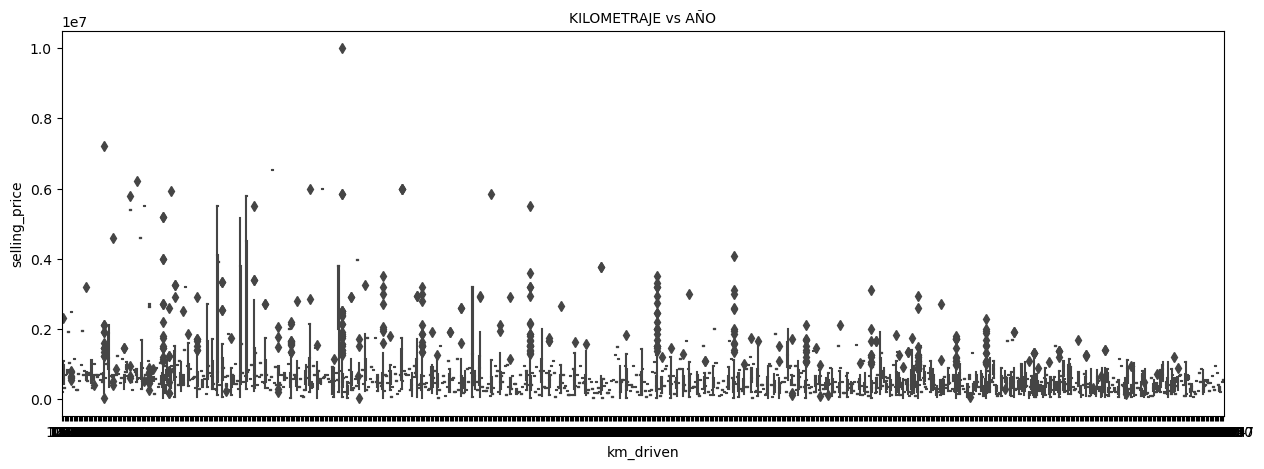

In [20]:
mplot.figure(figsize=(15,5))
sns.boxplot(x = conjuntoDatos['km_driven'], y = conjuntoDatos['selling_price'])
mplot.title("KILOMETRAJE vs AÑO", fontsize=10)

In [84]:
conjuntoDatos.info

<bound method DataFrame.info of                               name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission  